# Supervised Machine Learning
Supervised Machine Learning

The majority of practical machine learning uses supervised learning.

Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.

It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by the teacher. Learning stops when the algorithm achieves an acceptable level of performance.

#### Supervised machine learning problems can be further grouped into regression and classification problems.

* <b>Classification</b>: A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease” or "0/1" etc.
* <b>Regression</b>: A regression problem is when the output variable is a continuous numeric value, such as “Sales”, “Dollars” or “Weight”.

# Supervised ML Classification
We perform classification when the target variable is a category. e.g. We provide predictions to below kind of questions
1. "Wheather to approve a loan or not?" 
2. "Whether this person is a silver/gold/platinum customer?" 
3. "Whether is transaction is fradulent or not?"
4. "The logged support ticket belongs to which category P1/P2/P3?"

# Classification Case Study: Titanic Crash Survival
Problem Statement: "Create a Predictive model which can tell whether a given person will survive the Titanic crash or not?"
* Target Variable: Survival
* Predictors: Age, Gender, Tavel Class, Fare etc.

### Exploring the data

In [1]:
# Reading the Titanic Survival Data
# Reading the dataset
import pandas as pd
import numpy as np
TitanicSurvivalData=pd.read_csv('TitanicSurvivalData.csv', encoding='latin')
print('Shape before deleting duplicate values:', TitanicSurvivalData.shape)

# Removing duplicate rows if any
TitanicSurvivalData=TitanicSurvivalData.drop_duplicates()
print('Shape After deleting duplicate values:', TitanicSurvivalData.shape)

TitanicSurvivalData.head(10)
# Start observing the Quantitative/Categorical/Qualitative variables

Shape before deleting duplicate values: (891, 12)
Shape After deleting duplicate values: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [39]:
# Looking at the number of rows and columns
TitanicSurvivalData.shape

(891, 12)

In [2]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
TitanicSurvivalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
0.3*891

267.3

### Removing useless variables from data

In [4]:
# Data Pre Processing
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['PassengerId','Name','Ticket','Cabin']
TitanicSurvivalData = TitanicSurvivalData.drop(UselessColumns,axis=1)
TitanicSurvivalData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
# Looking at the statistial distribution of the data
TitanicSurvivalData.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


### Observe the distribution of target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<Axes: xlabel='Survived'>

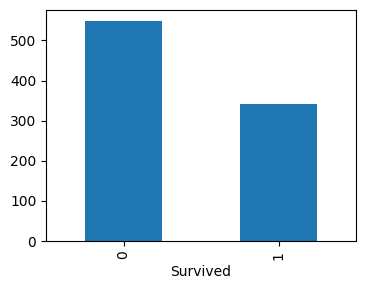

In [6]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=TitanicSurvivalData.groupby('Survived').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [7]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
TitanicSurvivalData.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

### Visualize distribution of all the categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

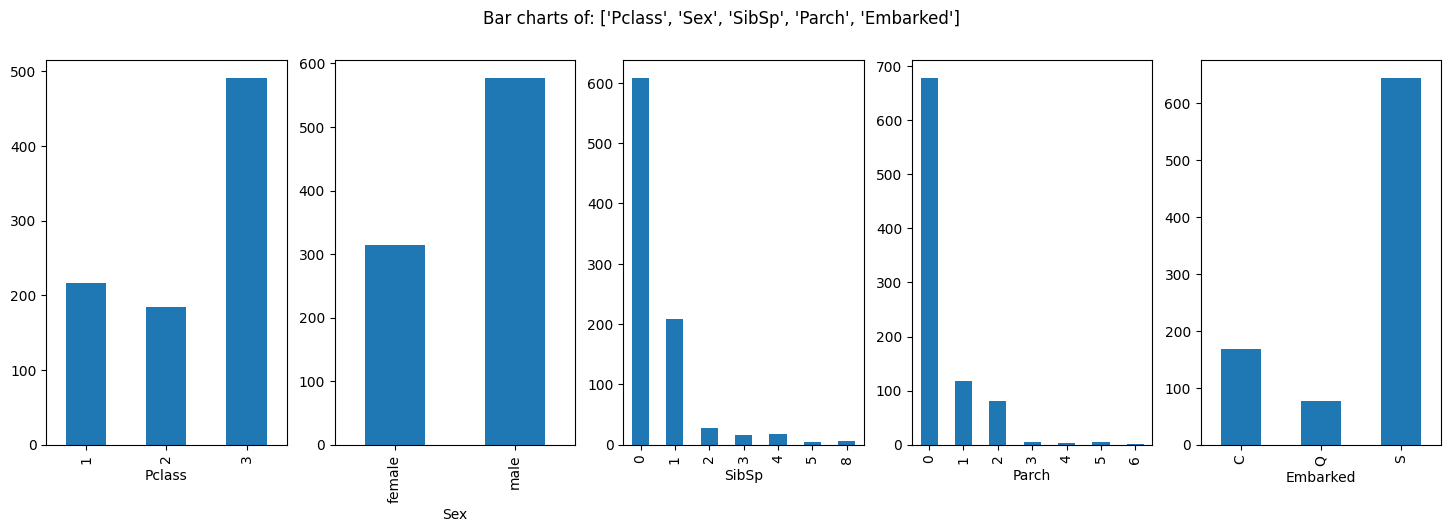

In [8]:
# Plotting multiple bar charts for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(18,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=TitanicSurvivalData, colsToPlot=['Pclass', 'Sex','SibSp','Parch','Embarked'])

### Visualize distribution of all the numeric Predictor variables in the data using histograms

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

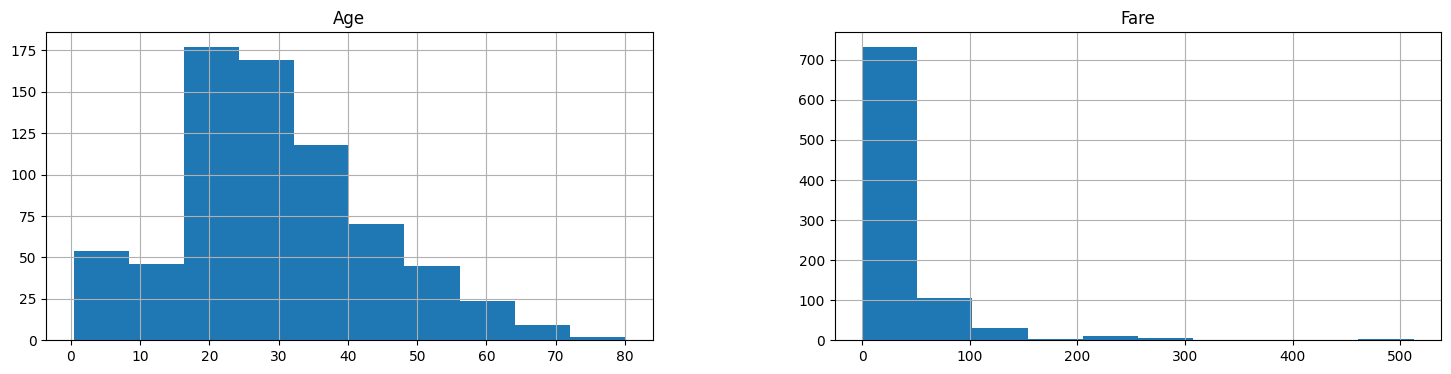

In [9]:
# Plotting histograms of multiple columns together
# Observe that Fare column has outliers
TitanicSurvivalData.hist(['Age', 'Fare'], figsize=(18,4))

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Bar Plot, Box Plot
* Categorical Vs Categorical---- Bar Plot

## Statistical measurement of relationship between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

### Relationship exploration: Categorical Vs Continuous
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

#### Visualizing the relation between Survived and Fare using bar charts
We Group by and keep categorical variable in the X-Axis and the continuous variable in the Y-Axis

In [12]:
# Grouping by Categorical variable Survived to find the aggregated values
GroupedData=TitanicSurvivalData.groupby('Survived')[['Age','Fare']]

# Printing the aggregated values
#GroupedData.size()
#GroupedData.sum()
#GroupedData.count()
GroupedData.mean()

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


<Axes: title={'center': 'Average Fare for Each Survival Type'}, xlabel='Survived'>

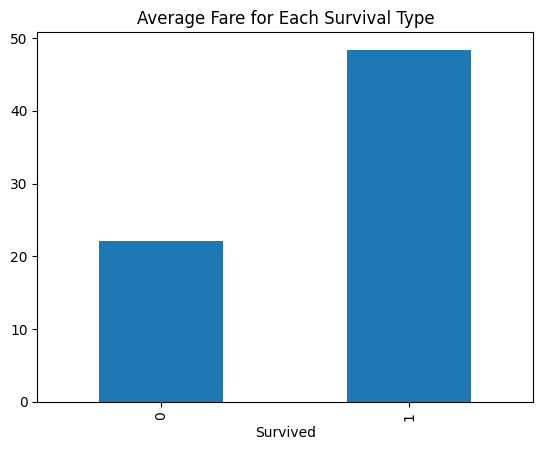

In [13]:
# Creating the graph with Price
# You can observice that many people who survived has paid higher fares!
GroupedData.mean()['Fare'].plot(kind='bar', title='Average Fare for Each Survival Type')

#### Looking at the variances in Fare by each Survival type in box plot
IF the distribution of each type is similar, it gives a hint that there is no correlation Between the categorical and the numeric variable

<Axes: title={'center': 'Fare'}, xlabel='Survived'>

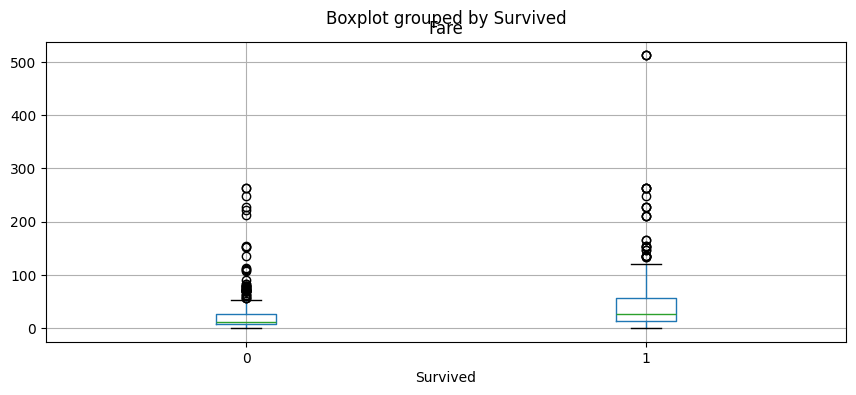

In [14]:
# Box plot for Categorical Variable Survived Vs Continuous Variable Fare
# Observe the outlier in Fare for Survived=1
TitanicSurvivalData.boxplot(column='Fare', by='Survived', figsize=(10,4), vert=True)

In [15]:
# Finding those rows where Fare column has outliers
# All the outlier fares are coming from Pclass=1 which makes sense!
TitanicSurvivalData[TitanicSurvivalData['Fare']>300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


#### Outlier Treatment
* Option-1: Delete the outlier Records
* Option-2: Impute the outlier values with a logical business value
* Below we are Finding out the most logical value to be replaced in place of outliers by looking at the box-plot of Fare Vs Pclass

<Axes: title={'center': 'Fare'}, ylabel='Pclass'>

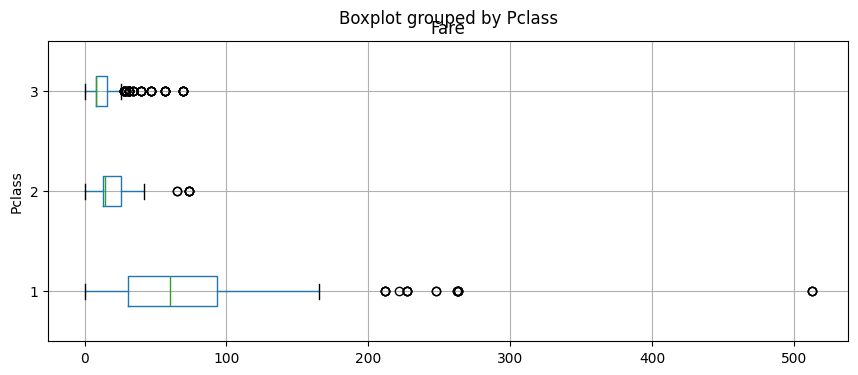

In [16]:
# As the outlier is on the higher side
# We observe what kind of fares have been paid by people travelling in Passenger Pclass=1
# This gives an idea about what is a typical high Fare paid by people
# We replace the Fare of outlier rows with this typical fare value of Class=1
# In this case it seems like Fare=263
TitanicSurvivalData.boxplot(column='Fare', by='Pclass', figsize=(10,4), vert=False)

In [17]:
# Replacing the outlier records of Fare with value 263
TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']>300] = 263

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15316\35173335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']>300] = 263


#### Box plot after Outlier treatment

<Axes: title={'center': 'Fare'}, xlabel='Survived'>

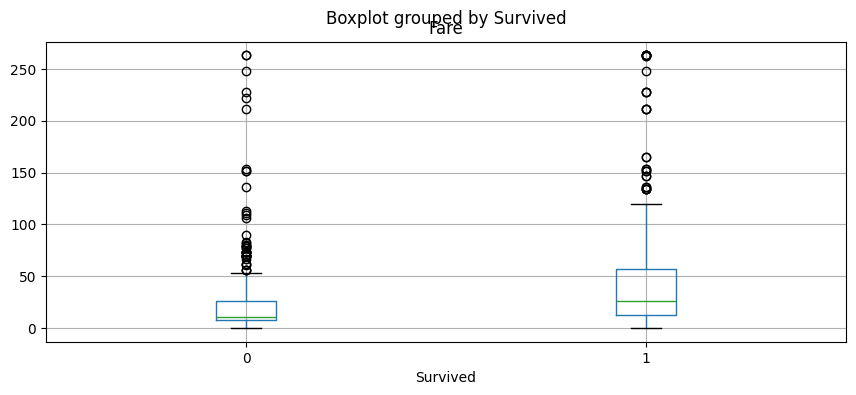

In [18]:
# Observing the relationship with Target variable again after Outlier treatment
# You can see that the distribution has improved now
TitanicSurvivalData.boxplot(column='Fare', by='Survived', figsize=(10,4), vert=True)

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [19]:
Survived_1=TitanicSurvivalData['Fare'][TitanicSurvivalData['Survived']==1]
Survived_1.head()

1    71.2833
2     7.9250
3    53.1000
8    11.1333
9    30.0708
Name: Fare, dtype: float64

In [22]:
CategoryGroupLists=TitanicSurvivalData.groupby('Survived')['Fare'].apply(list)
CategoryGroupLists

Survived
0    [7.25, 8.05, 8.4583, 51.8625, 21.075, 8.05, 31...
1    [71.2833, 7.925, 53.1, 11.1333, 30.0708, 16.7,...
Name: Fare, dtype: object

In [23]:
# f_oneway() function takes the group data as input and returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between Fare and Survived
# Assumption(H0) is that Fare and Survived are NOT correlated with each other

CategoryGroupLists=TitanicSurvivalData.groupby('Survived')['Fare'].apply(list)

Survived_0=TitanicSurvivalData['Fare'][TitanicSurvivalData['Survived']==0]
Survived_1=TitanicSurvivalData['Fare'][TitanicSurvivalData['Survived']==1]

# Performing the ANOVA test
AnovaResults = f_oneway(Survived_0, Survived_1)
AnovaResults1 = f_oneway(*CategoryGroupLists)

# Extreme example when all values are same and the variables are not correlated
#AnovaResults = f_oneway( [10,20], [10,20], [10,20] )

# Extreme example when all the values are different and both variables has correlation
#AnovaResults = f_oneway( [400,500], [7,10], [0.006,0.00001] )

print('P-Value for Anova is: ', AnovaResults[1],AnovaResults1[1])

# We accept the Assumption(H0) only when P-Value > 0.05
# Here the P-Value is almost Zero which means we will REJECT the Assumption(H0)
# This means Fare and Survived ARE correlated with each other

P-Value for Anova is:  1.8421954983111479e-16 1.8421954983111479e-16


In [25]:
CategoryGroupLists=TitanicSurvivalData.groupby('Survived')['Age'].apply(list)
CategoryGroupLists

Survived
0    [22.0, 35.0, nan, 54.0, 2.0, 20.0, 39.0, 14.0,...
1    [38.0, 26.0, 35.0, 27.0, 14.0, 4.0, 58.0, 55.0...
Name: Age, dtype: object

In [24]:
# f_oneway() function takes the group data as input and returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between Fare and Survived
# Assumption(H0) is that Fare and Survived are NOT correlated with each other

CategoryGroupLists=TitanicSurvivalData.groupby('Survived')['Age'].apply(list)

Survived_0=TitanicSurvivalData['Age'][TitanicSurvivalData['Survived']==0]
Survived_1=TitanicSurvivalData['Age'][TitanicSurvivalData['Survived']==1]

# Performing the ANOVA test
AnovaResults = f_oneway(Survived_0, Survived_1)
AnovaResults1 = f_oneway(*CategoryGroupLists)

# Extreme example when all values are same and the variables are not correlated
#AnovaResults = f_oneway( [10,20], [10,20], [10,20] )

# Extreme example when all the values are different and both variables has correlation
#AnovaResults = f_oneway( [400,500], [7,10], [0.006,0.00001] )

print('P-Value for Anova is: ', AnovaResults[1],AnovaResults1[1])

# We accept the Assumption(H0) only when P-Value > 0.05
# Here the P-Value is almost Zero which means we will REJECT the Assumption(H0)
# This means Fare and Survived ARE correlated with each other

P-Value for Anova is:  nan nan


In [ ]:
# Repeat the above ANOVA test fro all the categorical variable

### Relationship exploration: Categorical Vs Categorical
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

In [26]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=TitanicSurvivalData['Sex'], columns=TitanicSurvivalData['Survived'])
CrossTabResult

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex'>

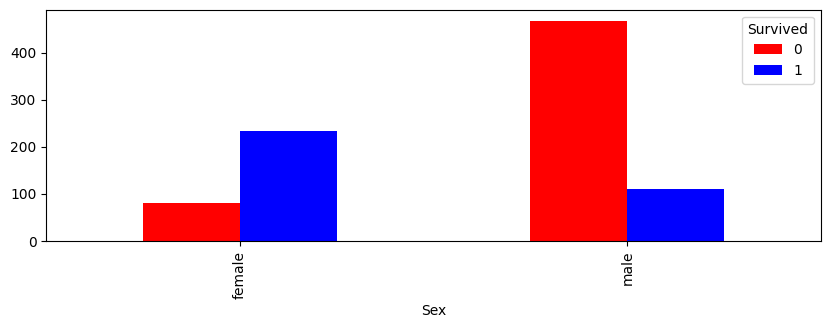

In [27]:
# Visual Inference using Grouped Bar chart
# Notice that Male Suvival rate is very low as compared to Female
CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'])

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True
* More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [28]:
from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrossTabResult)

# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
# In this case it is way way lower than 0.05 Hence, we reject H0
# this means the two columns are correlated with each other and Gender of a person affects the Survival
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.1973570627755645e-58


In [13]:
# Conduct chi-square test for all the categorical variables in the data Vs Target Variable Survived 
# Observe the P-Values for each test

#### Home Work
Write a function which takes three inputs: data, target variable and list predictor variables. And prints the P-Value of chi-sq test performed for each predictor variable against the target variable. Look at the sample function call for reference.
* FunctionChi_sq(inpData=TitanicSurvivalData, TargetVar='Survived', CategoricalPredictors=['Pclass', 'Sex', 'Embarked'])

In [14]:
# Extreme example of No correlation between two categorical variables
CrossTabSample=pd.crosstab(pd.Series(['a','a','b','b','b','c']), pd.Series(['d','d']))

# Performing Chi-sq test
ChiSqResultSample =chi2_contingency(CrossTabSample)

# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only Accept the assumption(H0)
# In this case P-Value is Higher than 0.05 Hence, we ACCEPT H0
# This means the two columns are NOT correlated with each other
print('The P-Value of the ChiSq Test is:', ChiSqResultSample[1])

The P-Value of the ChiSq Test is: 1.0


## Data Pre-processing for Machine Learning
List of steps performed before data can be used for machine learning
1. Treating Missing Values (Interpolate/Replace with median/Mode values)
2. Treating Outliers (Delete or replace with nearby logical value)
3. Converting each Ordinal Categorical columns to numeric
4. Converting all nominal Categorical columns to numeric
5. Data Transformation (Optional): Standardization/Normalization/log/sqrt

### Data Pre-Processing: Treating Missing Values
Various options for treating missing values in data
* Delete the missing value rows 
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [29]:
# Finding out how many missing values are present in each column
TitanicSurvivalData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [30]:
# Code to delete all the missing values at once
# Use this option only when the number of missing value rows are very few
print('Before Deleting missing values:', TitanicSurvivalData.shape)
TitanicSurvivalDataCleaned=TitanicSurvivalData.dropna()
print('After Deleting missing values:', TitanicSurvivalDataCleaned.shape)

Before Deleting missing values: (891, 8)
After Deleting missing values: (712, 8)


In [17]:
# How interpolate works?
numCol = pd.Series([0, 1, np.nan, 3, 4, 5, 6, np.nan, 8])
numCol = pd.Series([0, 5, np.nan, 4, 80, 14, 130, np.nan, 10])
CharCol = pd.Series(['Male', 'Male', np.nan, 'Female', 'Male', 'Female', 'Female', np.nan, 'Male'])

# For categorical data method= 'pad', 'ffill' , 'bfill' etc is used
#print(CharCol.interpolate(method='ffill'))

# For numeric data method= 'linear', 'quadratic' etc is used
numCol.interpolate(method='linear')

0      0.0
1      5.0
2      4.5
3      4.0
4     80.0
5     14.0
6    130.0
7     70.0
8     10.0
dtype: float64

In [31]:
# Treating missing values in each column

############################ Continuous Variables #############################################

# Replacing missing values by interpolation for a numeric variable
TitanicSurvivalData['Age']=TitanicSurvivalData['Age'].interpolate(method='linear')

# Replacing missing values with median value for a numeric variable
#MedianAge=CarPricesData['Age'].median()
#TitanicSurvivalData['Age']=TitanicSurvivalData['Age'].fillna(value=MedianWeight)

############################ Categorical Variables ############################################

# Replacing with interpolation for a categorical variable
TitanicSurvivalData['Embarked']=TitanicSurvivalData['Embarked'].interpolate(method='ffill')

# Replacing with mode value for a categorical variable
#ModeCC=CarPricesData['CC'].mode()[0]
#CarPricesData['CC']=CarPricesData['CC'].fillna(value=ModeCC)

In [32]:
# Every column must have Zero missing values before you proceed futher
TitanicSurvivalData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Data Pre-Processing: Treating Outliers
* Outliers are treated always in context to the target variable
* Outliers are treated by either deleting them or replacing the outlier values with a logical value as per business and similar data

In [33]:
# Referring to the bar charts plotted earlier for all the categorical columns, there are no outliers
# Referring to the histograms plotted earlier for all the continuous columns, there was outlier in the Fare column
# Fare column is already treated for the outlier above

### Data Pre-Processing: Converting Categorical data to numeric
1. First Treat all Ordinal variables by manually mapping the numeric values
2. Treat all nominal variables using dummy variables

In [34]:
# Treating nominal variable Sex first, as it is a binary variable.
TitanicSurvivalData['Sex'].replace({'male':1, 'female':0}, inplace=True)
TitanicSurvivalData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [35]:
# Treating all the nominal variables at once using dummy variables
TitanicSurvivalDataNumeric=pd.get_dummies(TitanicSurvivalData)
TitanicSurvivalDataNumeric.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


In [36]:
# Saving the processed data as a pickle file
TitanicSurvivalDataNumeric.to_pickle('TitanicSurvivalDataNumeric.pkl')

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [37]:
# Printing all the column names for our reference
TitanicSurvivalDataNumeric.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [38]:
# Separate Target Variable and Predictor Variables
TargetVariable='Survived'
Predictors=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked_C', 'Embarked_Q', 'Embarked_S']

X=TitanicSurvivalDataNumeric[Predictors].values
y=TitanicSurvivalDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 9)
(623,)
(268, 9)
(268,)


## Logistic Regression

In [40]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
#choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

LogisticRegression(C=1, solver='newton-cg')
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

[[137  20]
 [ 30  81]]
Accuracy of the model: 0.81


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,PredictedSurvived
0,3,1,23.0,1,1,15.2458,True,False,False,1,0
1,2,1,31.0,0,0,10.5,False,False,True,0,0
2,3,1,20.0,0,0,7.925,False,False,True,0,0
3,2,0,6.0,0,1,33.0,False,False,True,1,1
4,3,0,14.0,1,0,11.2417,True,False,False,1,1


In [45]:
TP=137
FP=30
FN=20
TN=81

In [47]:
Precison=TP/(TP+FP)
Precison

0.8203592814371258

In [48]:
Recall = TP/(TP+FN)
Recall

0.8726114649681529

In [49]:
F1=2*((Precison*Recall)/(Precison+Recall))
F1

0.845679012345679

In [83]:
# Picking up only the F1Score from the classification report output
print(metrics.classification_report(y_test, prediction).split()[-2])

0.81


## Decision Trees

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       157
           1       0.89      0.52      0.66       111

    accuracy                           0.78       268
   macro avg       0.82      0.74      0.75       268
weighted avg       0.80      0.78      0.76       268

[[150   7]
 [ 53  58]]
Accuracy of the model: 0.76


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,TargetColumn,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,0


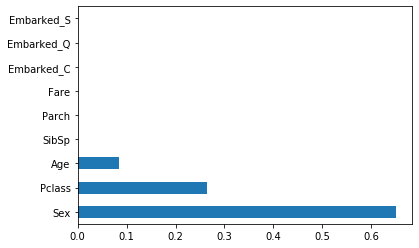

In [87]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting a Decision Tree

In [88]:
# Installing the required library for plotting the decision tree
#!pip install dtreeplt

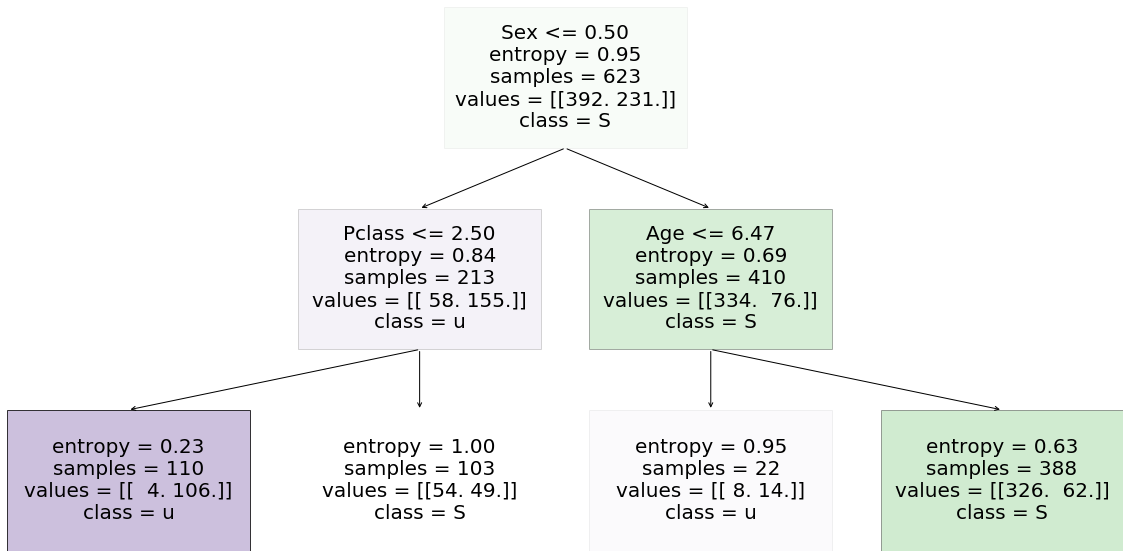

In [105]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt

# Plotting the decision tree
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# Get current figure and change its size
currentFigure=plt.gcf()
currentFigure.set_size_inches(20,10)

## Random Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       157
           1       0.88      0.65      0.75       111

    accuracy                           0.82       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.83      0.82      0.81       268

[[147  10]
 [ 39  72]]
Accuracy of the model: 0.81


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,TargetColumn,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,1


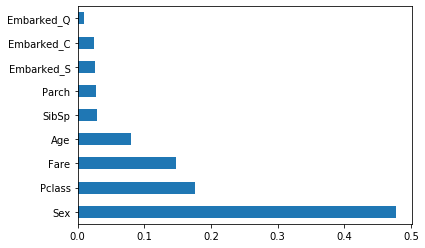

In [106]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, n_estimators=200,criterion='entropy')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting one of the Decision Trees in Random Forest

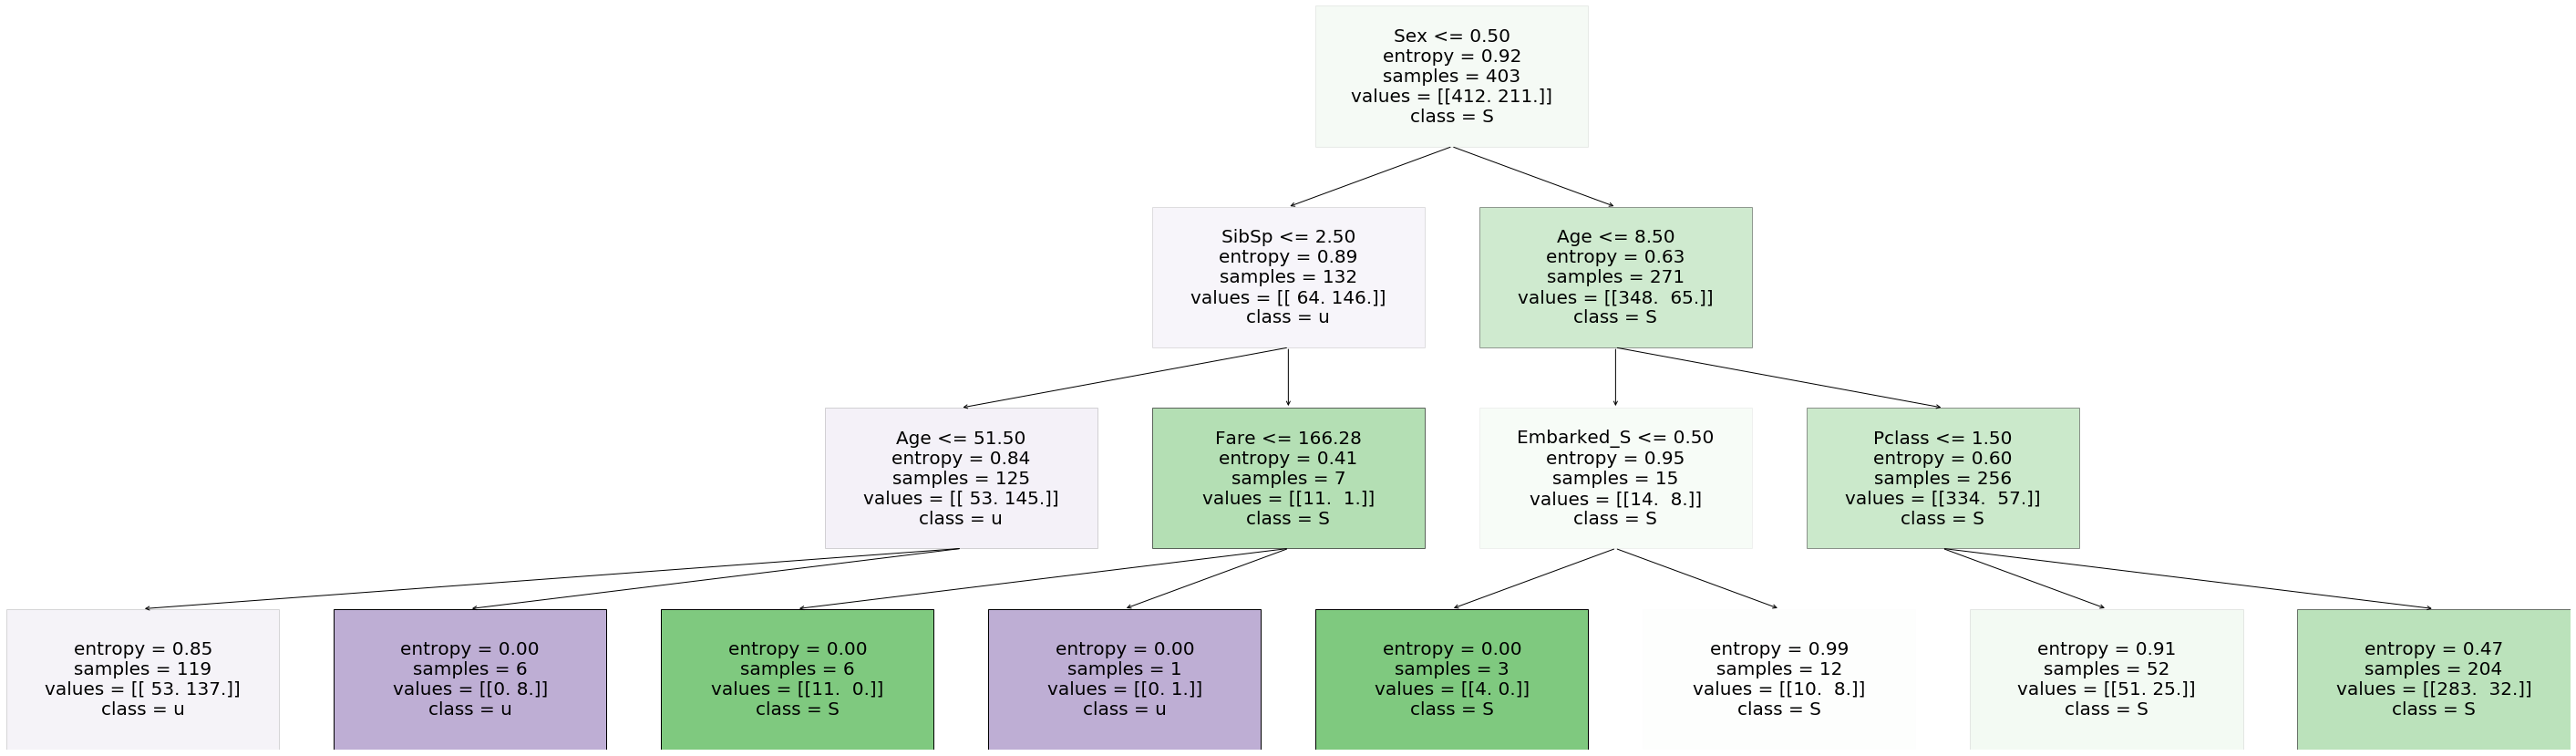

In [109]:
# PLotting 10th single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

## AdaBoost

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,TargetColumn,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,1


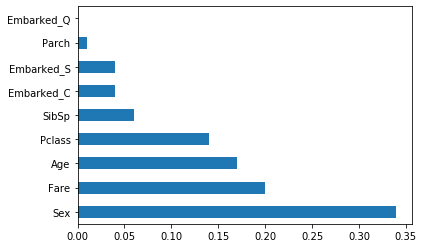

In [113]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.06)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting one of the Decision trees from Adaboost

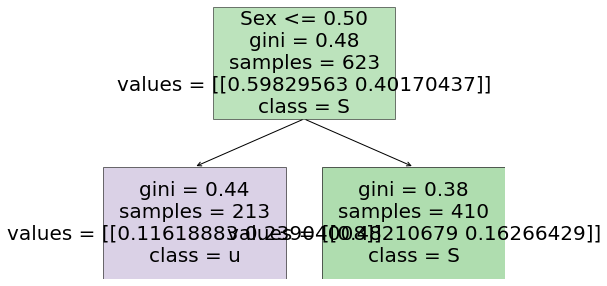

In [114]:
# PLotting 5th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

## XGBoost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=None, n_estimators=400,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       157
           1       0.88      0.66      0.75       111

    accuracy                           0.82       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268

[[147  10]
 [ 38  73]]
Accuracy of the model: 0.82


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,TargetColumn,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,1


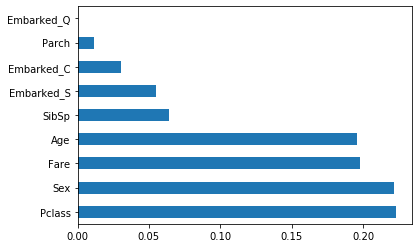

In [33]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=400, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting a single Decision tree out of XGBoost

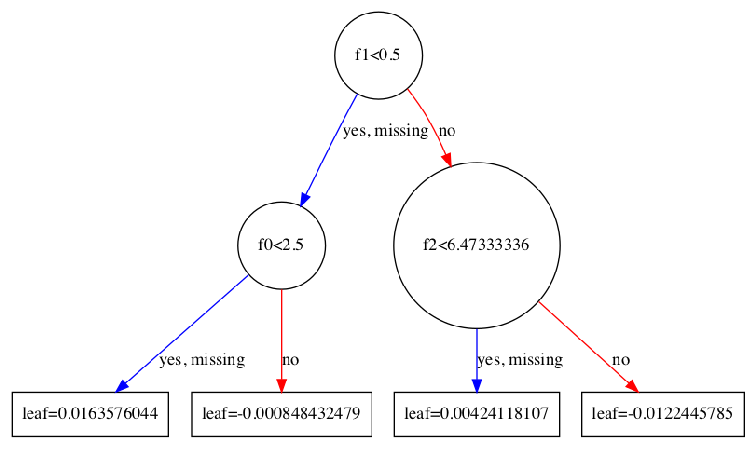

In [34]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

## KNN

In [35]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       157
           1       0.77      0.30      0.43       111

    accuracy                           0.67       268
   macro avg       0.71      0.62      0.60       268
weighted avg       0.70      0.67      0.63       268

[[147  10]
 [ 78  33]]
Accuracy of the model: 0.63


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,TargetColumn,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,0
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,1


## SVM

In [36]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=20, kernel='rbf', gamma=0.01)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       157
           1       0.76      0.65      0.70       111

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268

[[134  23]
 [ 39  72]]
Accuracy of the model: 0.77


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,TargetColumn,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,1


## Naive Bayes

In [37]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       157
           1       0.68      0.80      0.74       111

    accuracy                           0.76       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.76      0.77       268

[[116  41]
 [ 22  89]]
Accuracy of the model: 0.77


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,TargetColumn,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,1
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,1
